## 
Colorado 
Plots Comparisons
Tensor elevation + cell

In [327]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import cftime
import cartopy
import cartopy.crs as ccrs
import matplotlib.colors as colors
import cmaps
from xhistogram.xarray import histogram
from statsmodels.nonparametric.smoothers_lowess import lowess as  sm_lowess
from copy import copy
import geopandas as gpd
from shapely.geometry import Point

In [328]:
state_borders =\
cartopy.feature.NaturalEarthFeature(category='cultural',\
        name='admin_1_states_provinces_lakes', scale='50m', facecolor='none')

In [329]:
import warnings
warnings.filterwarnings('ignore')

| Location| Location | Scale |Shape |
|:--------:|:--------:|:--------:|:--------:|
| Test 0|  ~ 1 | ~ 1  |  ~ 1   | # eXtremes GEV computation (independent)
| Test 1|  ~ s(elevation("cr",k=10)) + s(cell("mrf",k=100))  | ~ s(elevation("cr",k=10)) + s(cell("mrf",k=100))  |  ~ s(elevation("cr",k=10)) + s(cell("mrf",k=100))   |
| Test 2|  ~ s(elevation("cr",k=20)) + s(cell("mrf",k=50))   | ~ s(elevation("cr",k=20)) + s(cell("mrf",k=50))   |  ~ s(elevation("cr",k=20)) + s(cell("mrf",k=50))   |
| Test 3|  ~ s(elevation("cr",k=10)) + s(cell("mrf",k=50))   | ~ s(elevation("cr",k=10)) + s(cell("mrf",k=50))  |  ~ s(elevation("cr",k=10)) + s(cell("mrf",k=50))    |
| Test 4|  ~ te(elevation("cr",k=10), cell("mrf",k=100))  | ~ 1  |  ~ 1   |
| Test 5|  ~ te(elevation("cr",k=20), cell("mrf",k=50))   | ~ 1  |  ~ 1   |
| Test 6|  ~ te(elevation("cr",k=10), cell("mrf",k=50))   | ~ 1  |  ~ 1   |
| Test 7|  ~ te(elevation("cr",k=10), cell("mrf",k=50))  |  ~ te(elevation("cr",k=10), cell("mrf",k=50))   |  ~ 1   |
| Test 8|  ~ te(elevation("cr",k=10), cell("mrf",k=50)) |  ~ te(elevation("cr",k=10), cell("mrf",k=50))   |  ~ te(elevation("cr",k=10), cell("mrf",k=50))  |

# READ EVGAM output FILES

In [330]:
yearb=1941
yeare=2023

dirin ='/Users/ghervieux/AFI'

ds0 = xr.open_dataset(f'{dirin}/Colorado_ij_extremes_gev_1941_2023.nc')
rl1000 = ds0['rl100'] 
loc0 = ds0['location'] 
scale0 = ds0['scale'] 
shape0 = ds0['shape'] 

ds1 = xr.open_dataset(f'{dirin}/Colorado_cr10_mrf100_loc_sc_sh_1941_2023.nc')
rl1001 = ds1['rl100'] 
loc1 = ds1['location'] 
scale1 = ds1['scale'] 
shape1 = ds1['shape'] 

ds2 = xr.open_dataset(f'{dirin}/Colorado_cr20_mrf50_loc_sc_sh_1941_2023.nc')
rl1002 = ds2['rl100'] 
loc2 = ds2['location'] 
scale2 = ds2['scale'] 
shape2 = ds2['shape'] 

ds3 = xr.open_dataset(f'{dirin}/Colorado_cr10_mrf50_loc_sc_sh_1941_2023.nc')
rl1003 = ds3['rl100'] 
loc3 = ds3['location'] 
scale3 = ds3['scale'] 
shape3 = ds3['shape'] 

ds4 = xr.open_dataset(f'{dirin}/Colorado_tensor_cr10_mrf100_loc_1941_2023.nc')
rl1004 = ds4['rl100'] 
loc4 = ds4['location'] 
scale4 = ds4['scale'] 
shape4 = ds4['shape'] 

ds5 = xr.open_dataset(f'{dirin}/Colorado_tensor_cr20_mrf50_loc_1941_2023.nc')
rl1005 = ds5['rl100'] 
loc5 = ds5['location'] 
scale5 = ds5['scale'] 
shape5 = ds5['shape'] 

ds6 = xr.open_dataset(f'{dirin}/Colorado_tensor_cr10_mrf50_loc_1941_2023.nc')
rl1006 = ds6['rl100'] 
loc6 = ds6['location'] 
scale6 = ds6['scale'] 
shape6 = ds6['shape'] 

ds7 = xr.open_dataset(f'{dirin}/Colorado_tensor_cr10_mrf50_loc_1941_2023.nc')
rl1007 = ds7['rl100']*np.nan 
loc7 = ds7['location']*np.nan 
scale7 = ds7['scale']*np.nan 
shape7 = ds7['shape']*np.nan 

ds8 = xr.open_dataset(f'{dirin}/Colorado_tensor_cr10_mrf50_loc_sc_sh_1941_2023.nc')
rl1008 = ds8['rl100'] 
loc8 = ds8['location'] 
scale8 = ds8['scale'] 
shape8 = ds8['shape'] 

units = 'degree-days (°C)'

In [331]:
rl1000 = rl1000.expand_dims({'time':ds1['time']})
loc0 = loc0.expand_dims({'time':ds1['time']})
scale0 = scale0.expand_dims({'time':ds1['time']})
shape0 = shape0.expand_dims({'time':ds1['time']})

In [332]:
Trl100 = [rl1000, rl1001, rl1002, rl1003, rl1004, rl1005, rl1006, rl1007, rl1008]
Tloc = [loc0, loc1, loc2, loc3, loc4, loc5, loc6, loc7, loc8]
Tscale = [scale0, scale1, scale2, scale3, scale4, scale5, scale6, scale7, scale8]
Tshape = [shape0, shape1, shape2, shape3, shape4, shape5, shape6, shape7, shape8]


In [333]:
dshgt = xr.open_dataset('/Users/ghervieux/AFI/hgt.sfc.era5.1.nc')
dshgt = dshgt.sortby('lat')
dshgt = dshgt.isel(time=0, drop=True)

# Reduce domain for testing purpose

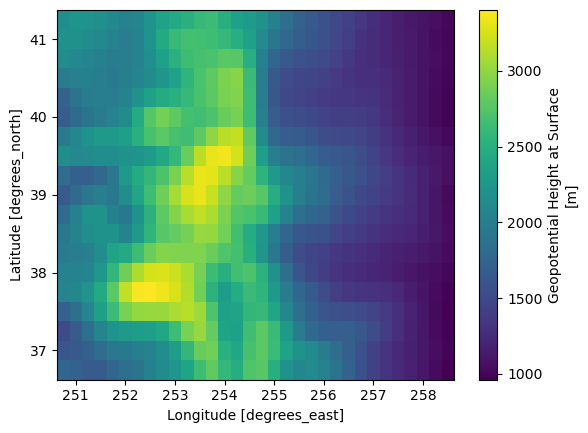

In [334]:
lon_min = 250.6
lon_max = 258.5
lat_min = 36.7
lat_max = 41.3
dshgt = xr.open_dataset('/Users/ghervieux/AFI/hgt.sfc.era5.1.nc')
dshgt = dshgt.sortby('lat')
dshgt = dshgt.isel(time=0, drop=True)
dshgt = dshgt.sel(lon=slice(lon_min,lon_max),lat=slice(lat_min,lat_max))
elevation = dshgt['hgt']
elevation.plot()

# PLOT Return Level 100

Text(0.5, 0.98, 'Return Level 100year, year=1941')

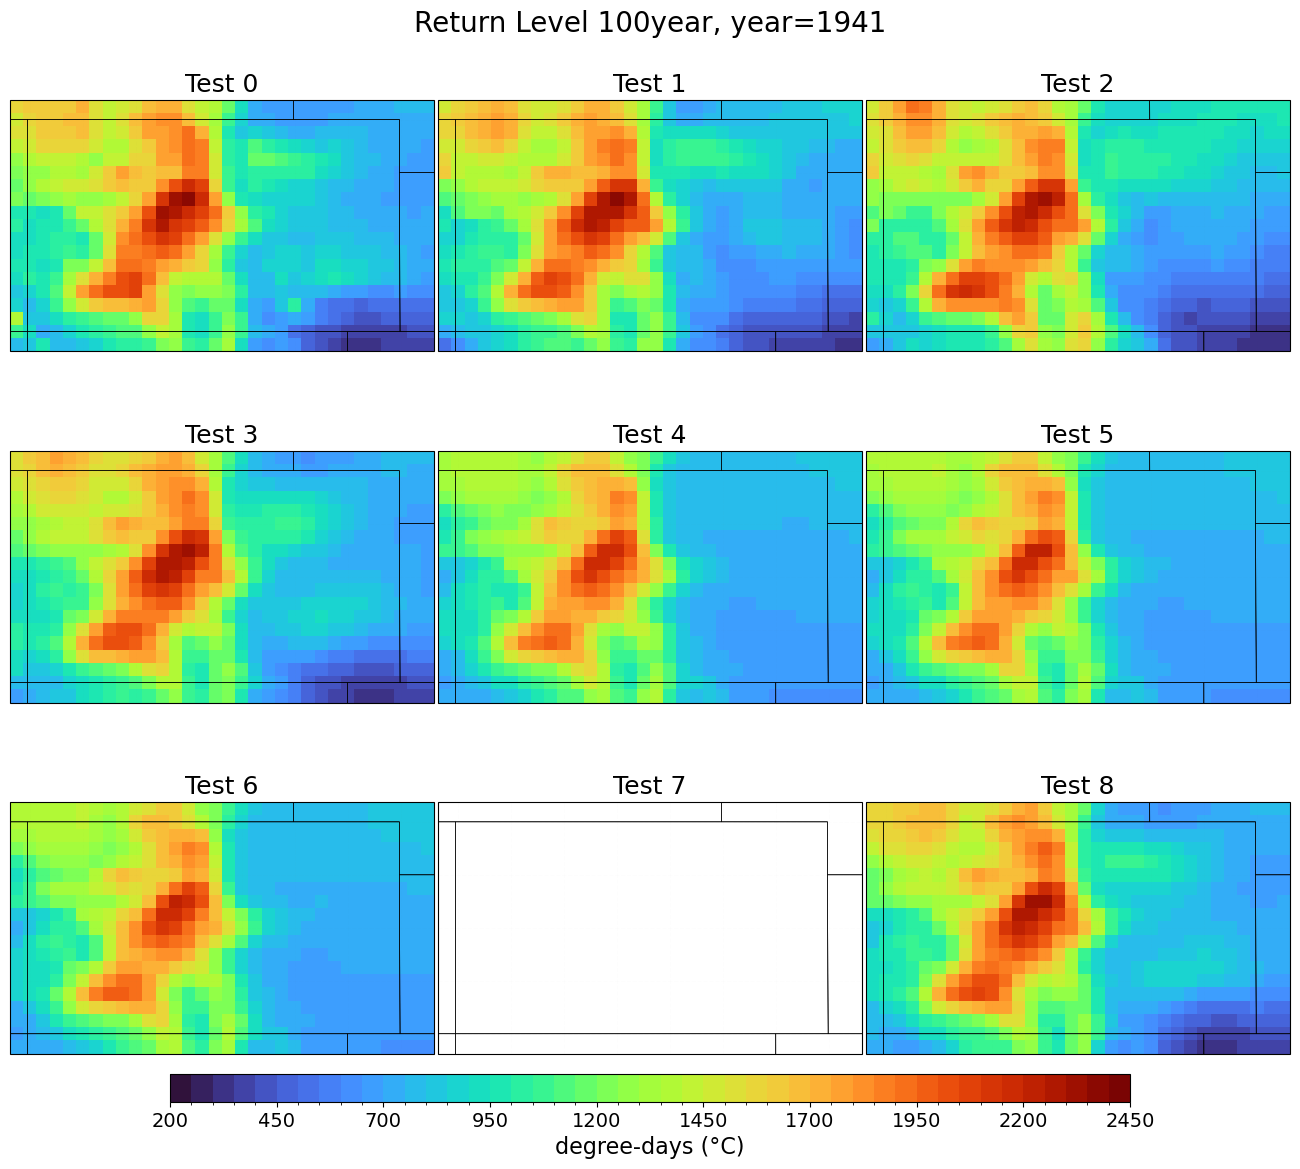

In [335]:

proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(16,14),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,9):
  cc = Trl100[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(200,2500,50),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_title(f'Test {ix}',fontsize=18)  
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'{units}',fontsize=16)
plt.suptitle(f'Return Level 100year, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Return Level 100year, year=1941')

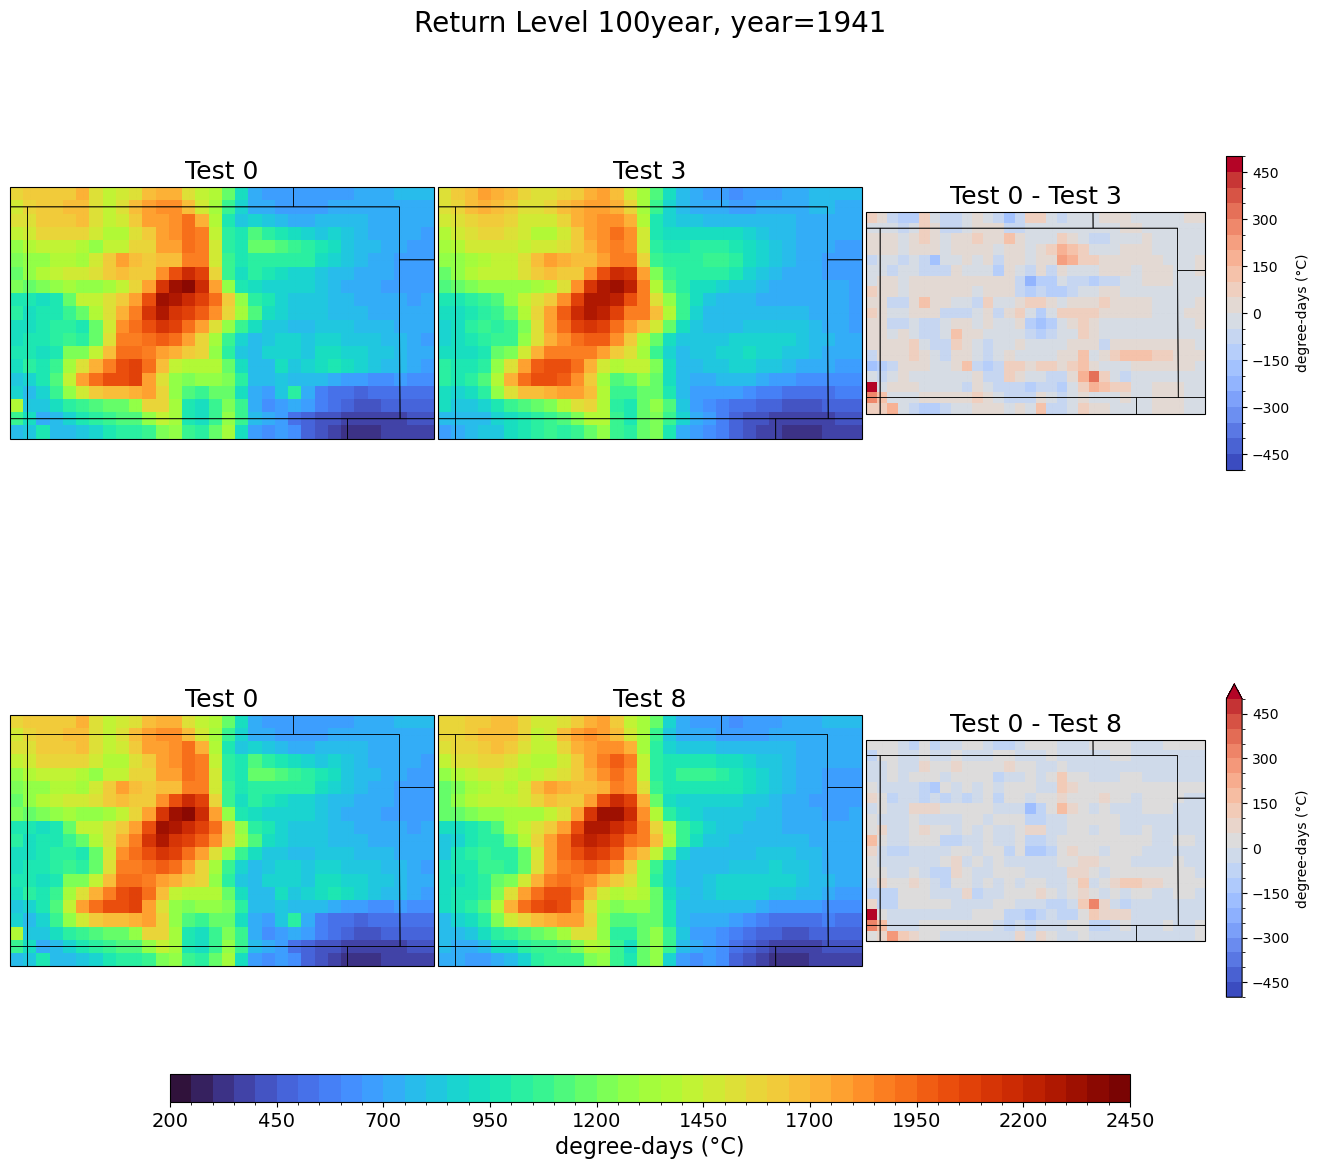

In [336]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=2,ncols=3,figsize=(16,14),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,6,3):
  cc = Trl100[0].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(200,2500,50),add_colorbar=False)
  ax[ix].set_title(f'Test 0',fontsize=18)  
Trl100[3].sel(time=yearb).plot.pcolormesh(ax=ax[1],cmap='turbo',levels=np.arange(200,2500,50),add_colorbar=False)
ax[1].set_title(f'Test 3',fontsize=18)  
Trl100[8].sel(time=yearb).plot.pcolormesh(ax=ax[4],cmap='turbo',levels=np.arange(200,2500,50),add_colorbar=False)
ax[4].set_title(f'Test 8',fontsize=18)  
(Trl100[0]-Trl100[3]).sel(time=yearb).plot.pcolormesh(ax=ax[2],cmap='coolwarm',levels=np.arange(-500,550,50),cbar_kwargs={'label':units,'shrink':0.6})
ax[2].set_title(f'Test 0 - Test 3',fontsize=18)  
(Trl100[0]-Trl100[8]).sel(time=yearb).plot.pcolormesh(ax=ax[5],cmap='coolwarm',levels=np.arange(-500,550,50),cbar_kwargs={'label':units,'shrink':0.6})
ax[5].set_title(f'Test 0 - Test 8',fontsize=18)  
for ix in range(0,6):  
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()

#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'{units}',fontsize=16)
plt.suptitle(f'Return Level 100year, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Location parameter, year=1941')

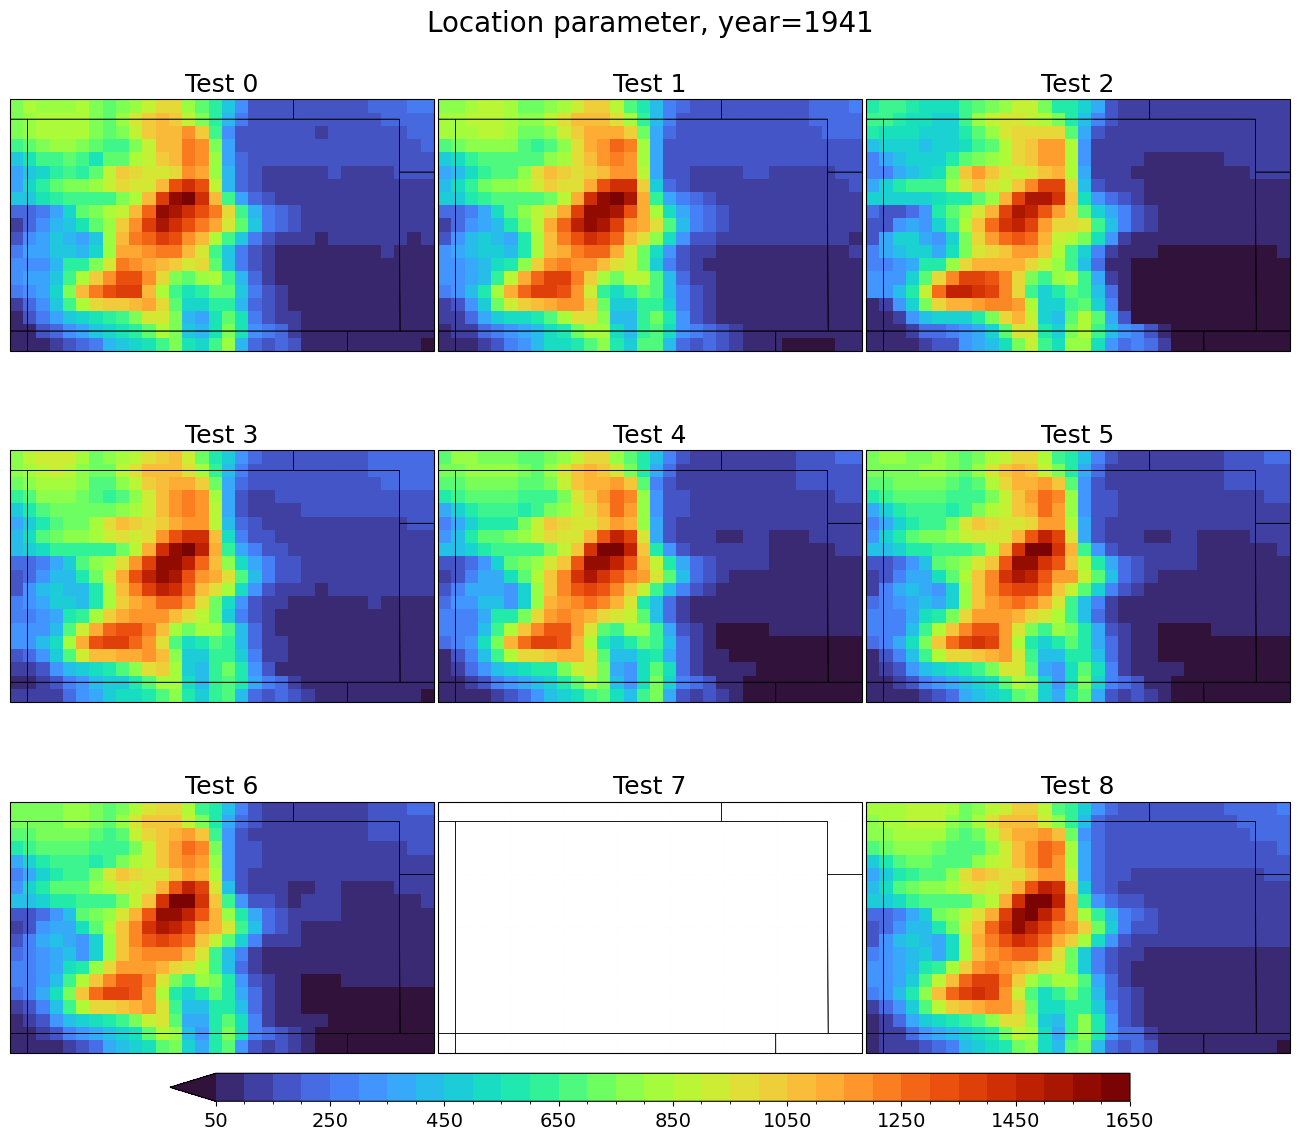

In [337]:

proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(16,14),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,9):
  cc = Tloc[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(50,1700,50),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_title(f'Test {ix}',fontsize=18)  
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Location parameter, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Scale parameter, year=1941')

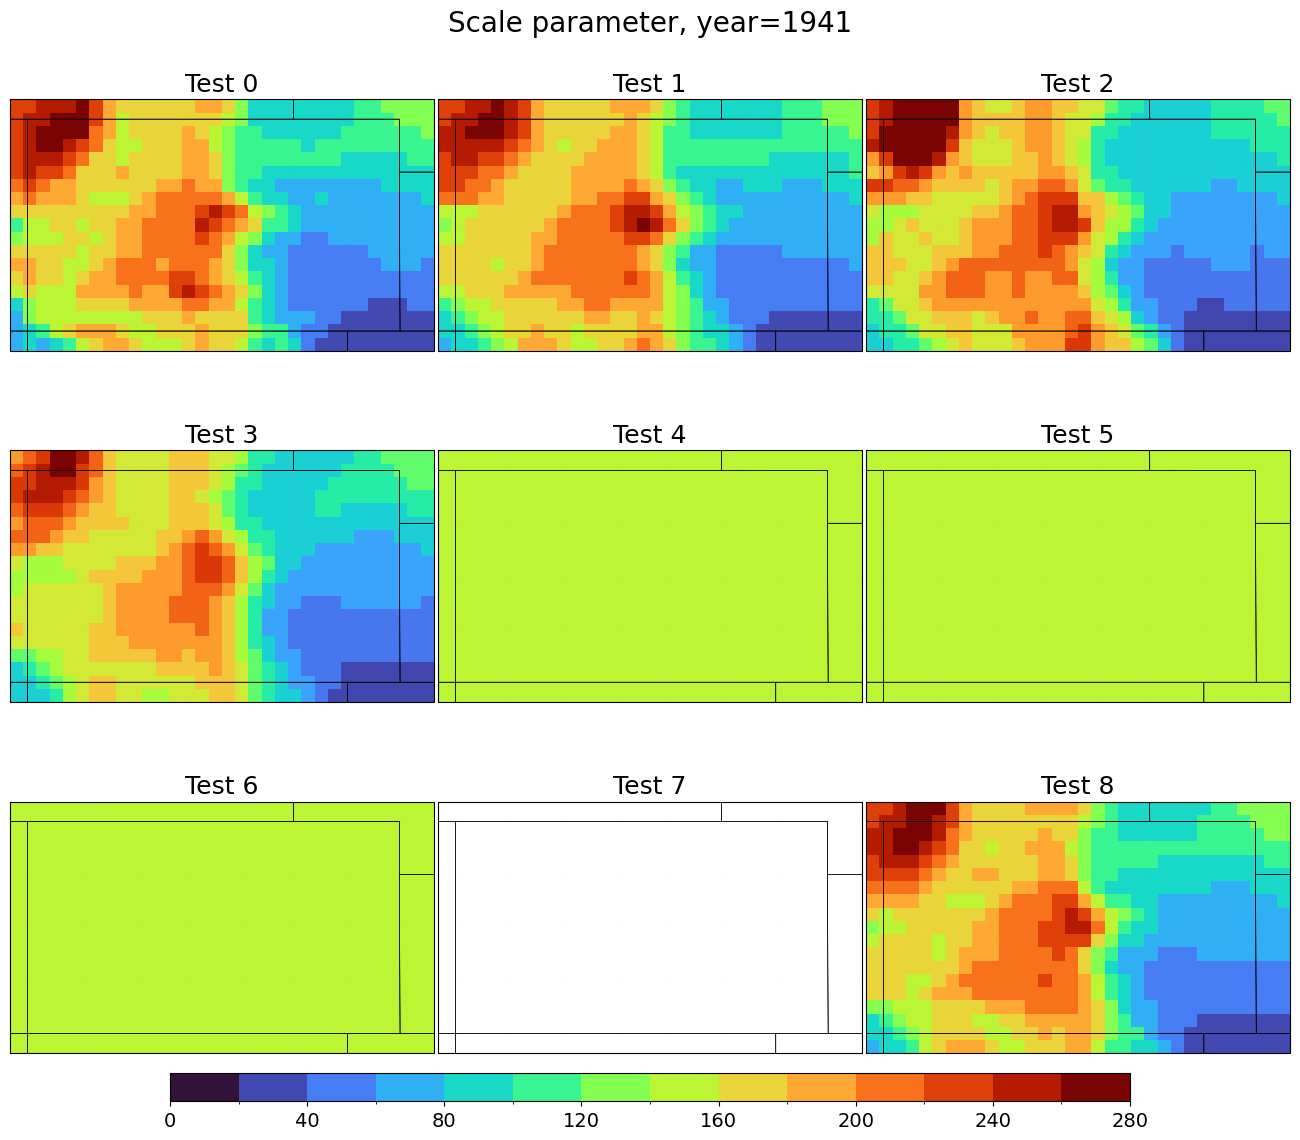

In [338]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(16,14),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,9):
  cc = Tscale[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap='turbo',levels=np.arange(0,300,20),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_title(f'Test {ix}',fontsize=18)  
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Scale parameter, year={yearb}',fontsize=20)  

Text(0.5, 0.98, 'Shape parameter, year=1941')

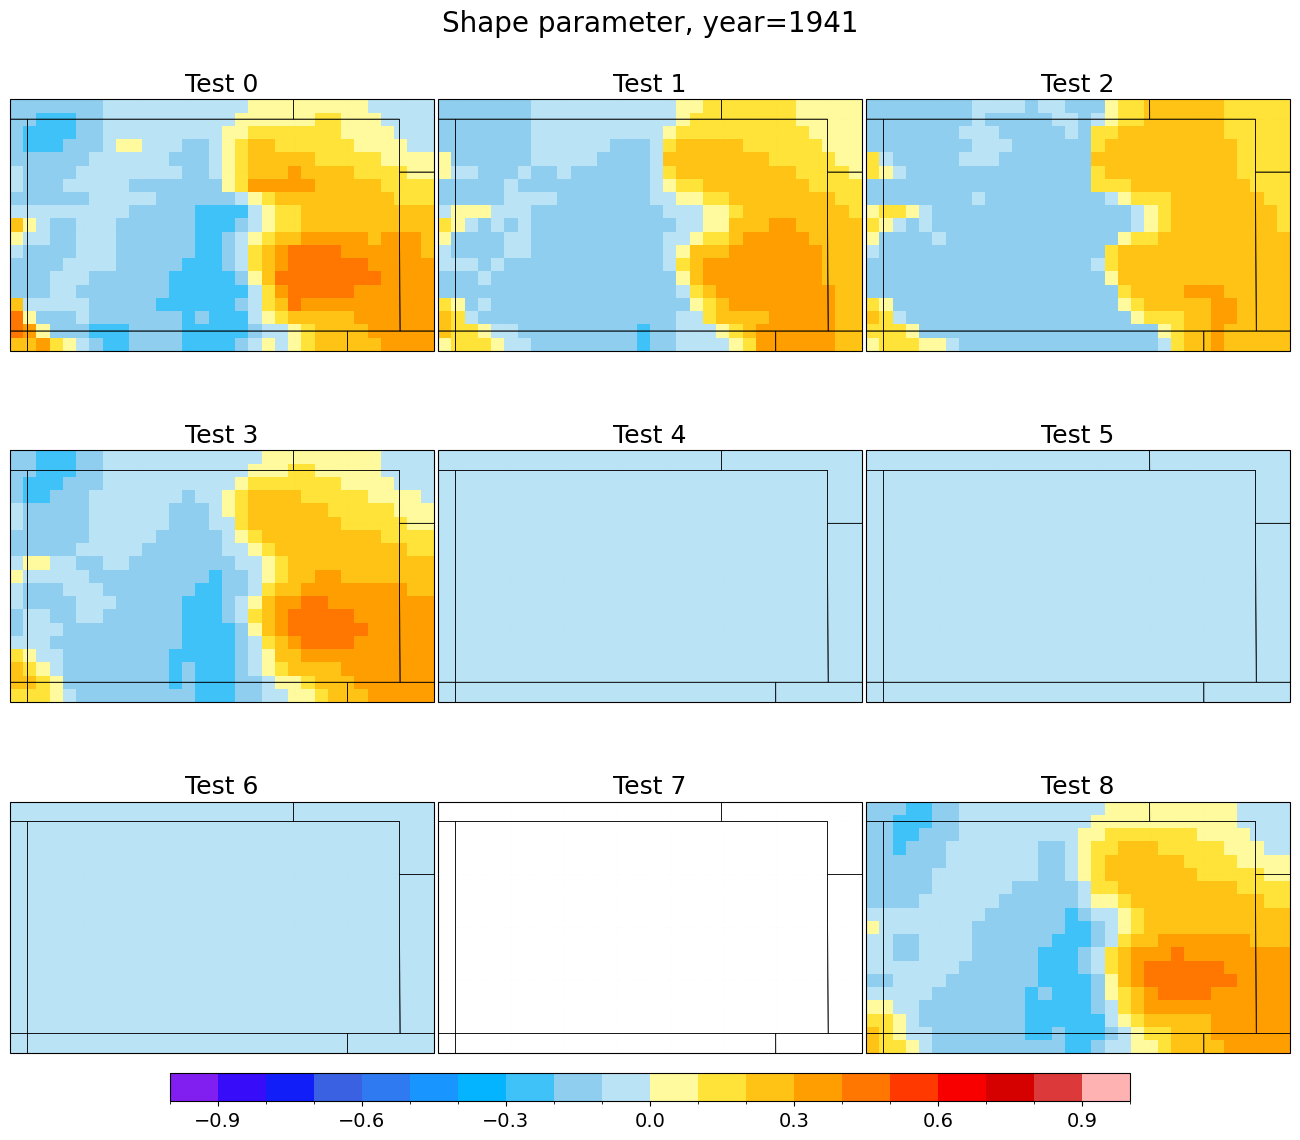

In [339]:
proj=ccrs.PlateCarree()

fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(16,14),subplot_kw={'projection':proj})
plt.subplots_adjust(bottom=0.2,left=0.1, right=0.9,top=0.95,hspace=0.01,wspace=0.01)
ax = ax.flatten()
for ix in range(0,9):
  cc = Tshape[ix].sel(time=yearb).plot.pcolormesh(ax=ax[ix],cmap=cmaps.ncl_default,levels=np.arange(-1,1.1,0.1),add_colorbar=False)
  ####
  grd = ax[ix].gridlines(
    draw_labels=False, 
    color='gray', alpha=0.01, linestyle='--')

  ax[ix].set_xlabel('')
  ax[ix].set_ylabel('')
  ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
  ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
  ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
  ax[ix].coastlines()
  ax[ix].set_title(f'Test {ix}',fontsize=18)  
#
ax_cbar = fig.add_axes([0.2, 0.2, 0.6, 0.02])
cbar=fig.colorbar(cc,cax=ax_cbar,shrink=0.5,orientation='horizontal')
cbar.ax.tick_params(labelsize=14)  
cbar.set_label(label=f'',fontsize=16)
plt.suptitle(f'Shape parameter, year={yearb}',fontsize=20)  

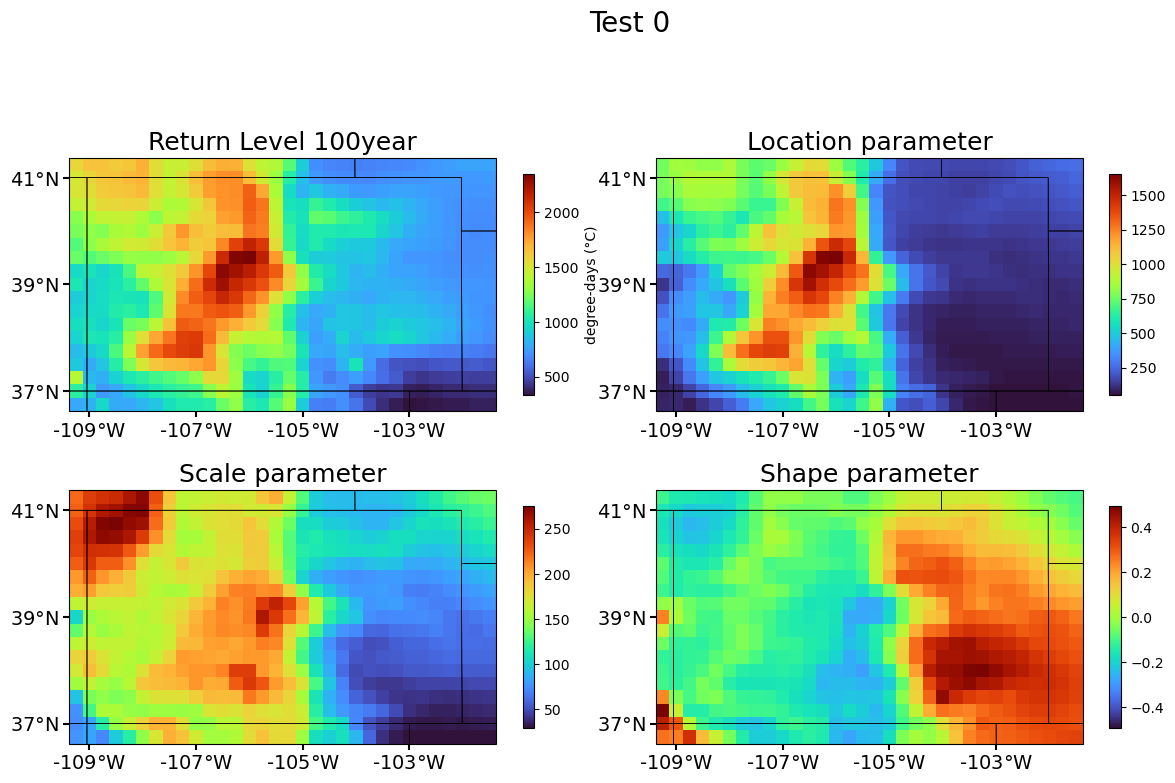

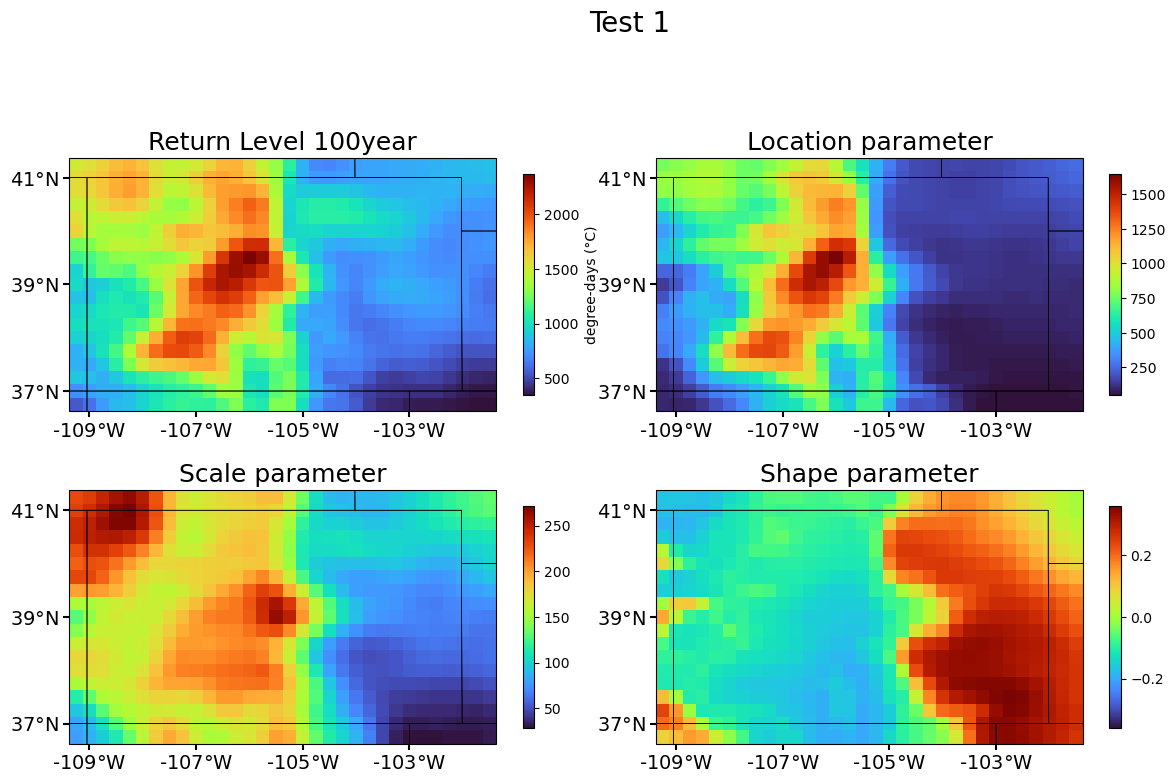

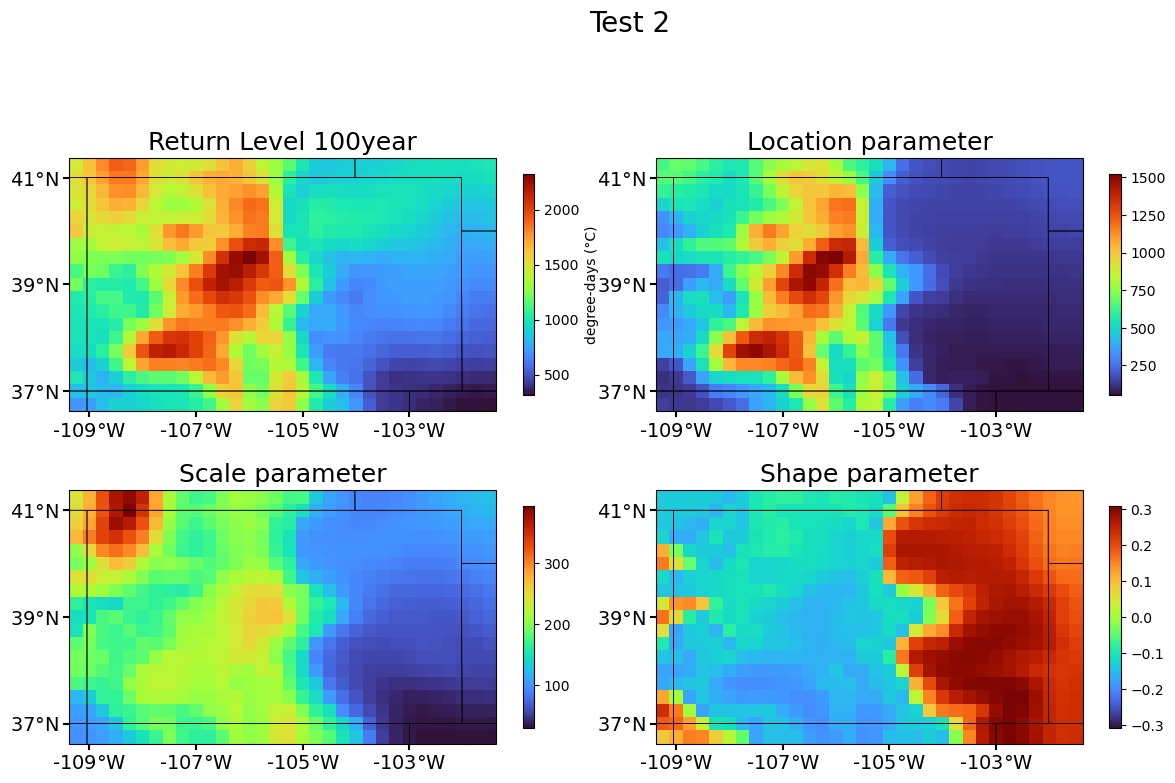

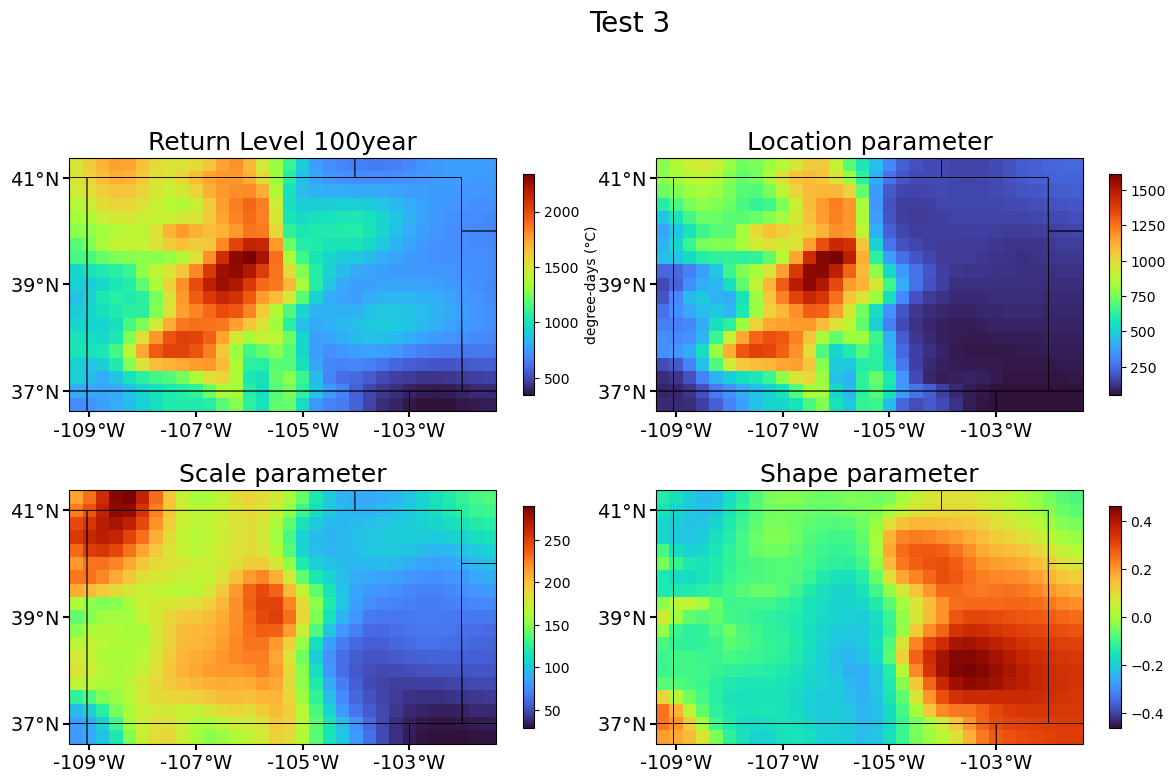

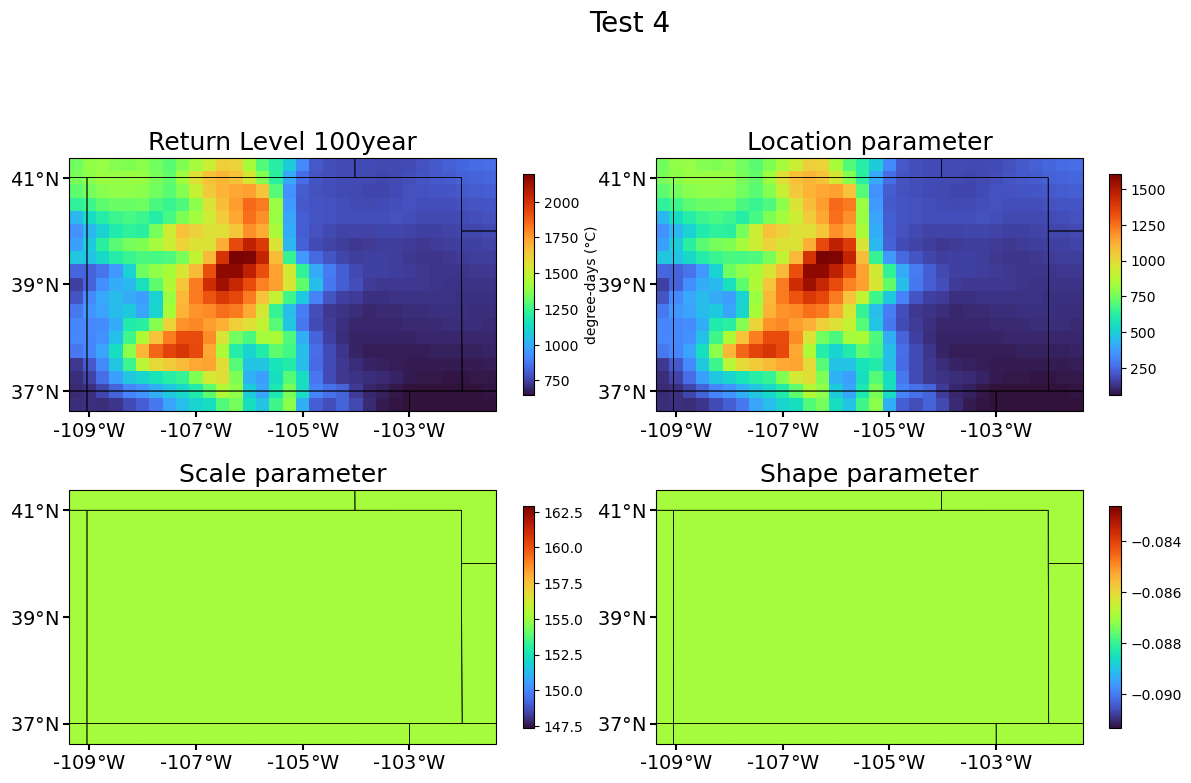

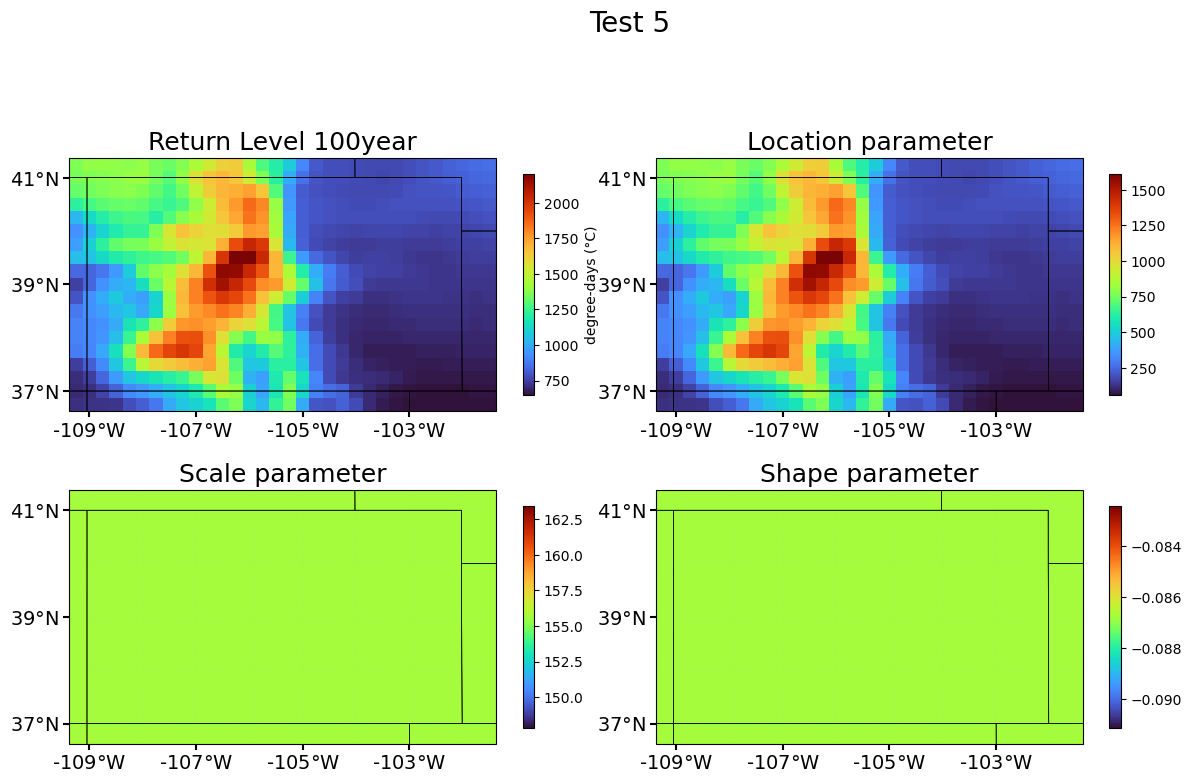

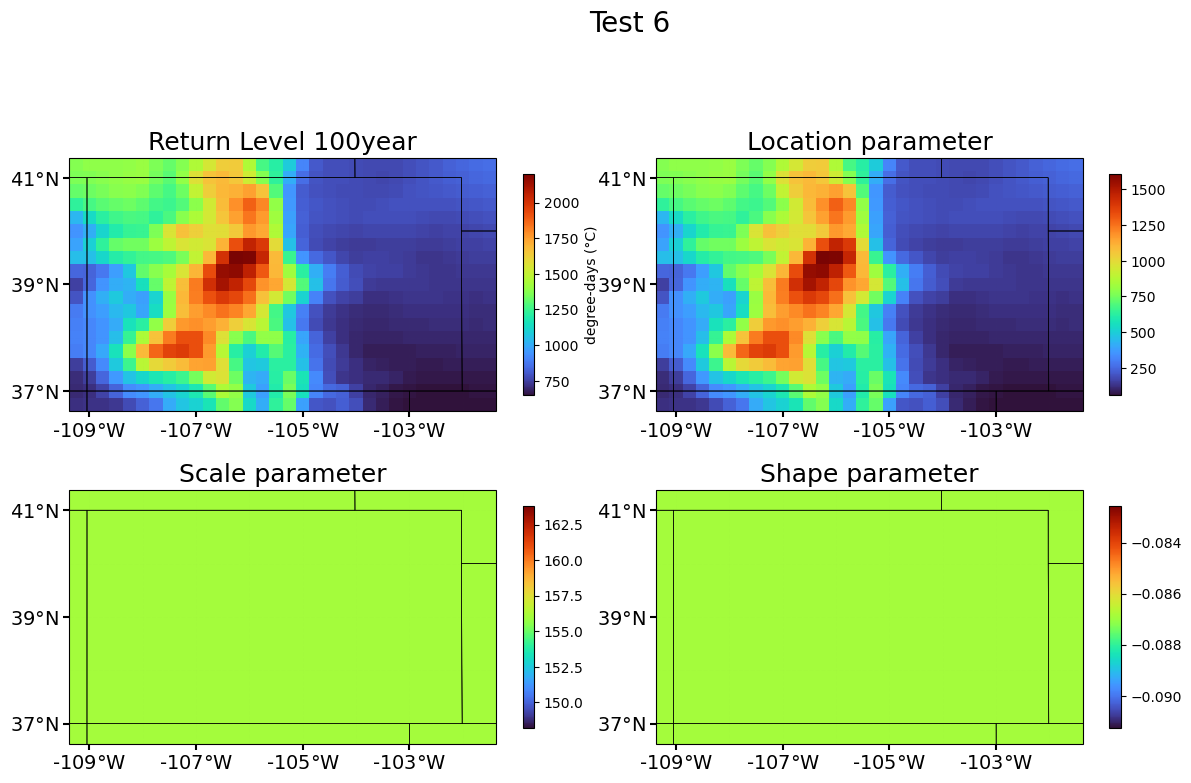

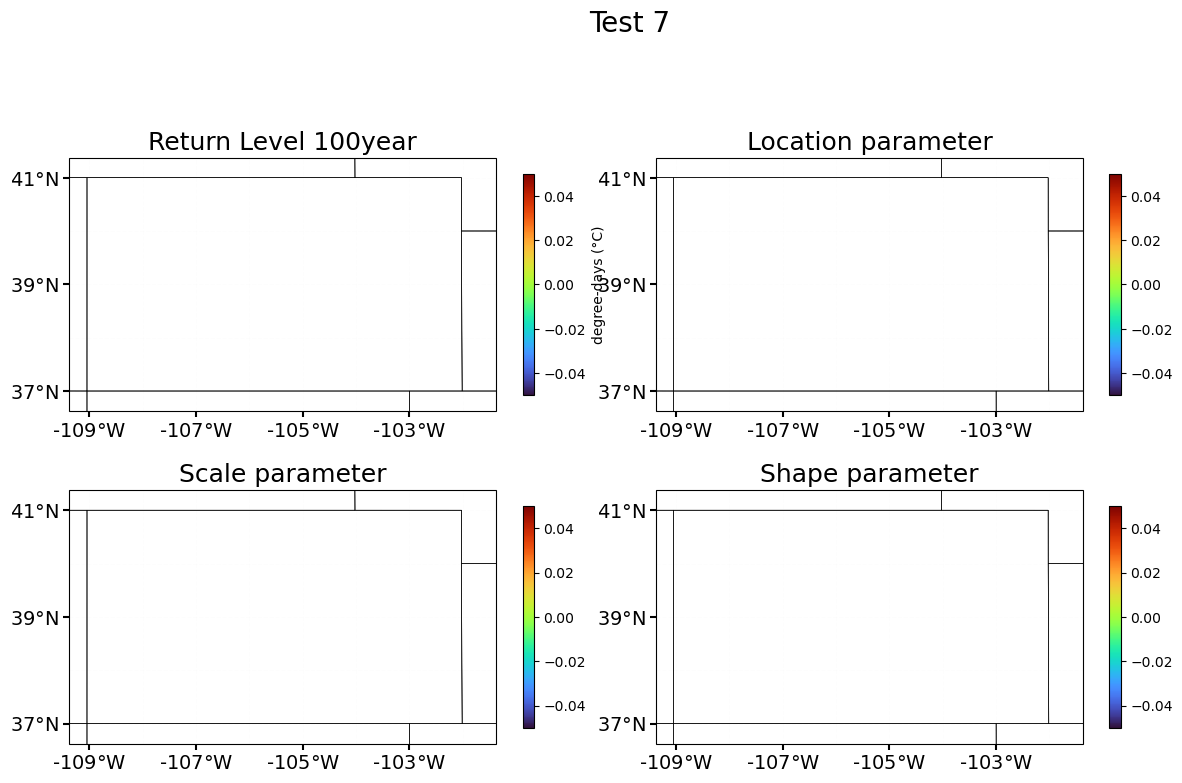

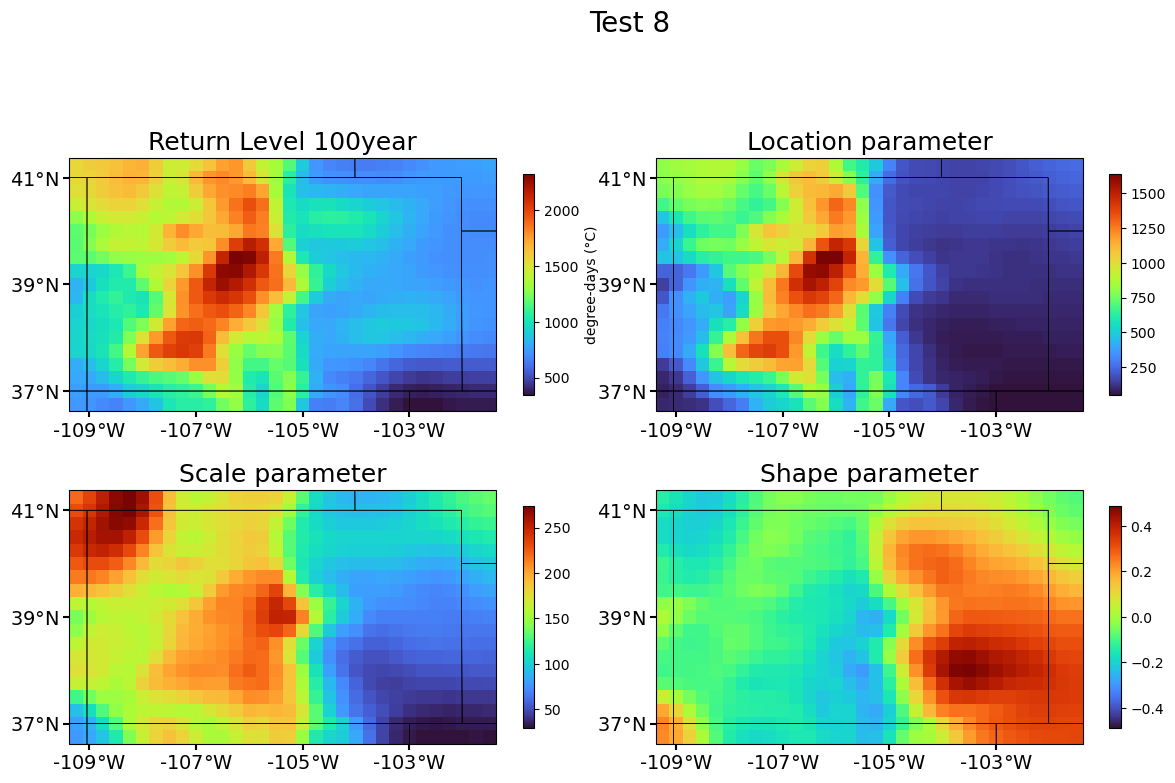

In [340]:

proj=ccrs.PlateCarree()
for it in range(0,9):

  fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(14,9),subplot_kw={'projection':proj})
  plt.subplots_adjust(bottom=0.1,left=0.1, right=0.9,wspace=.1,hspace=-0.1)
  ax = ax.flatten()
  Trl100[it].sel(time=yearb).plot.pcolormesh(ax=ax[0],cmap='turbo',cbar_kwargs={'label':units,'shrink':0.6})
  ax[0].set_title(f'Return Level 100year',fontsize=18)  
  Tloc[it].sel(time=yearb).plot.pcolormesh(ax=ax[1],cmap='turbo',cbar_kwargs={'label':'','shrink':0.6})
  ax[1].set_title(f'Location parameter',fontsize=18)  
  Tscale[it].sel(time=yearb).plot.pcolormesh(ax=ax[2],cmap='turbo',cbar_kwargs={'label':'','shrink':0.6})
  ax[2].set_title(f'Scale parameter',fontsize=18)  
  Tshape[it].sel(time=yearb).plot.pcolormesh(ax=ax[3],cmap='turbo',cbar_kwargs={'label':'','shrink':0.6})
  ax[3].set_title(f'Shape parameter',fontsize=18)  
  ####
  for ix in range(0,4): 
    grd = ax[ix].gridlines(
        draw_labels=False, 
        color='gray', alpha=0.01, linestyle='--')

    ax[ix].set_xlabel('')
    ax[ix].set_ylabel('')
    ax[ix].add_feature(state_borders,zorder=100,linewidth=0.4,edgecolor='k')
    ax[ix].tick_params(axis='both',direction='out',width=1.5,length=4)
    ax[ix].set_yticks(ax[ix].get_yticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_yticklabels([f'{round(ixx)}$\degree$N' for ixx in ax[ix].get_yticks()],size=14)
    ax[ix].set_xticks(ax[ix].get_xticks()[1:-1:2],crs=ccrs.PlateCarree())
    ax[ix].set_xticklabels([f'{round(ixx)}$\degree$W' for ixx in ax[ix].get_xticks()],size=14)
    ax[ix].add_feature(state_borders,zorder=100,edgecolor='k',linewidth=0.15) 
    ax[ix].coastlines()
  #
  plt.suptitle(f'Test {it}',fontsize=20)  
  plt.show()